[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


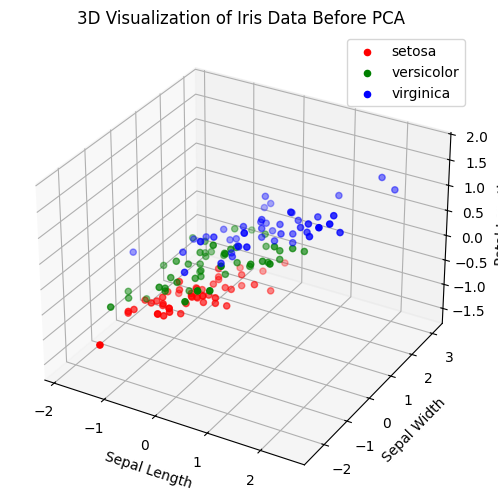

Singular Values: [20.92306556 11.7091661   4.69185798  1.76273239]
Explained Variance by PC1: 0.73
Explained Variance by PC2: 0.23


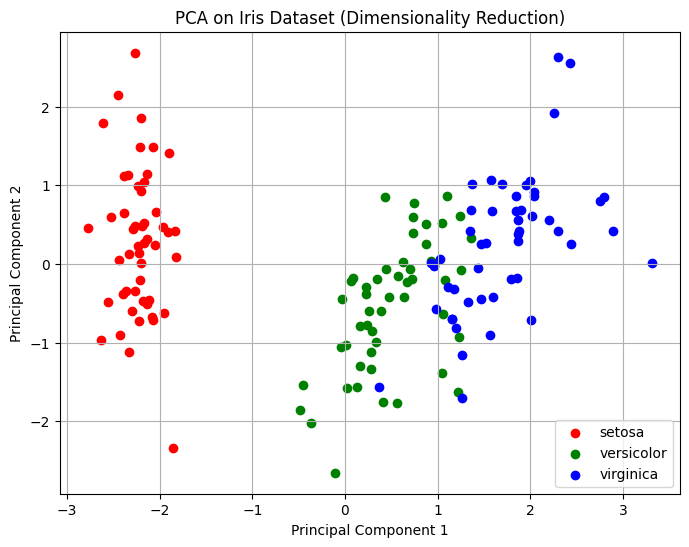

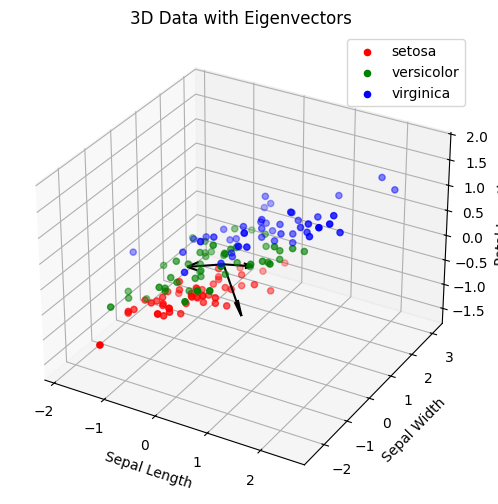

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Step 1: Load the Iris Dataset
iris = datasets.load_iris()
X = iris.data # Extracting feature matrix (4D data)
y = iris.target # Extracting labels (0, 1, 2 representing three iris species)
# Step 2: Standardizing the Data
# PCA works best when data is standardized (mean = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
	
# Step 3: Calculating Covariance Matrix and Eigenvalues/Eigenvectors
# The foundation of PCA is eigen decomposition of the covariance matrix
cov_matrix = np.cov(X_scaled.T) 
print(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) 
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Step 4: Visualizing Data in 3D before PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') 
colors = ['red', 'green', 'blue']
labels = iris.target_names
for i in range(len(colors)):
    ax.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], X_scaled[y == i, 2], color=colors[i],label=labels[i])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width') 
ax.set_zlabel('Petal Length')
ax.set_title('3D Visualization of Iris Data Before PCA') 
plt.legend()
plt.show()

# Step 5: Applying PCA using SVD (Singular Value Decomposition)
# PCA internally relies on SVD, which decomposes a matrix into three parts: U, S, a
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False) 
print("Singular Values:", S)

# Step 6: Applying PCA to Reduce Dimensionality to 2D
# We reduce 4D data to 2D for visualization while retaining maximum variance
pca = PCA(n_components=2) # We choose 2 components because we want to visualize
X_pca = pca.fit_transform(X_scaled)  # Transform data into principal components

# Step 7: Understanding Variance Explained
# PCA provides the percentage of variance retained in each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}") 
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")


# Step 8: Visualizing the Transformed Data
# We plot the 2D representation of the Iris dataset after PCA transformation
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=labels[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset (Dimensionality Reduction)') 
plt.legend()
plt.grid() 
plt.show()
# Step 9: Visualizing Eigenvectors Superimposed on 3D Data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(colors)):
    ax.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], X_scaled[y == i, 2], color=colors[i],label=labels[i])
for i in range(3): # Plot first three eigenvectors
    ax.quiver(0, 0, 0, eigenvectors[i, 0], eigenvectors[i, 1], eigenvectors[i, 2],color='black')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width') 
ax.set_zlabel('Petal Length')
ax.set_title('3D Data with Eigenvectors') 
plt.legend()
plt.show()


